In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline    

df = pd.read_csv('./patient_data.csv')
df.head(5)

,Date,Minimum Air Temperature,Maximum Air Temperature,Relative Humidity (%),Rainfall (mm),Weekday,Weekend,Holiday,Day after holiday,No. of A&E first attendances,total adult patient,Total children patient
0,1/12/2019,17.80,28.05,64,0.0,0,1,1,0,713,3255,256
1,2/12/2019,14.25,20.40,45,0.0,1,0,0,1,797,3269,279
2,3/12/2019,12.75,20.15,34,0.0,1,0,0,0,752,3136,286
3,4/12/2019,13.30,21.45,27,0.0,1,0,0,0,766,3118,265
4,5/12/2019,12.20,17.90,43,1.2,1,0,0,0,782,3104,264


In [5]:
col = ['Minimum Air Temperature','Maximum Air Temperature','Relative Humidity (%)', 'Rainfall (mm)', 'Weekday', 'Weekend', 'Holiday', 'Day after holiday']
X = df[col] 
X.head()
list_numerical = ['Minimum Air Temperature','Maximum Air Temperature','Relative Humidity (%)', 'Rainfall (mm)']

In [6]:
y_total = df['No. of A&E first attendances']
y_adult = df['total adult patient']
y_children = df['Total children patient']

# The first ridge regression model would be total number of patient

In [7]:
X_train, X_test, y_total_train, y_total_test = train_test_split(X, y_total, test_size=0.7, random_state=101)

In [8]:
pipeline_total = make_pipeline(StandardScaler(), Ridge(alpha=0.001))
pipeline_total.fit(X_train, y_total_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.001))])

In [9]:
y_total_train_pred = pipeline_total.predict(X_train)
y_total_test_pred = pipeline_total.predict(X_test)
y_total_pred_ridge = pipeline_total.predict(X)

In [10]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_total_train, y_total_train_pred),
                mean_squared_error(y_total_test, y_total_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_total_train, y_total_train_pred), r2_score(y_total_test, y_total_test_pred)))

MSE train: 12270.191, test: 11111.404
R^2 train: 0.089, test: 0.069


In [11]:
df_predicted_patient_total_ridge = pd.DataFrame(y_total_pred_ridge,index=y_total.index,columns = ['predicted_patient_total_ridge'])  
df_predicted_patient_total_ridge

,predicted_patient_total_ridge
0,594.474057
1,656.869373
2,658.423724
3,652.587927
4,660.477071
...,...
478,666.317494
479,619.041139
480,608.039573
481,671.942783


In [12]:
new_df_total_ridge = pd.DataFrame()
new_df_total_ridge['actual_patient_total'] = list(y_total)
new_df_total_ridge['predicted_patient_total'] = y_total_pred_ridge
new_df_total_ridge

,actual_patient_total,predicted_patient_total
0,713,594.474057
1,797,656.869373
2,752,658.423724
3,766,652.587927
4,782,660.477071
...,...,...
478,776,666.317494
479,630,619.041139
480,626,608.039573
481,819,671.942783


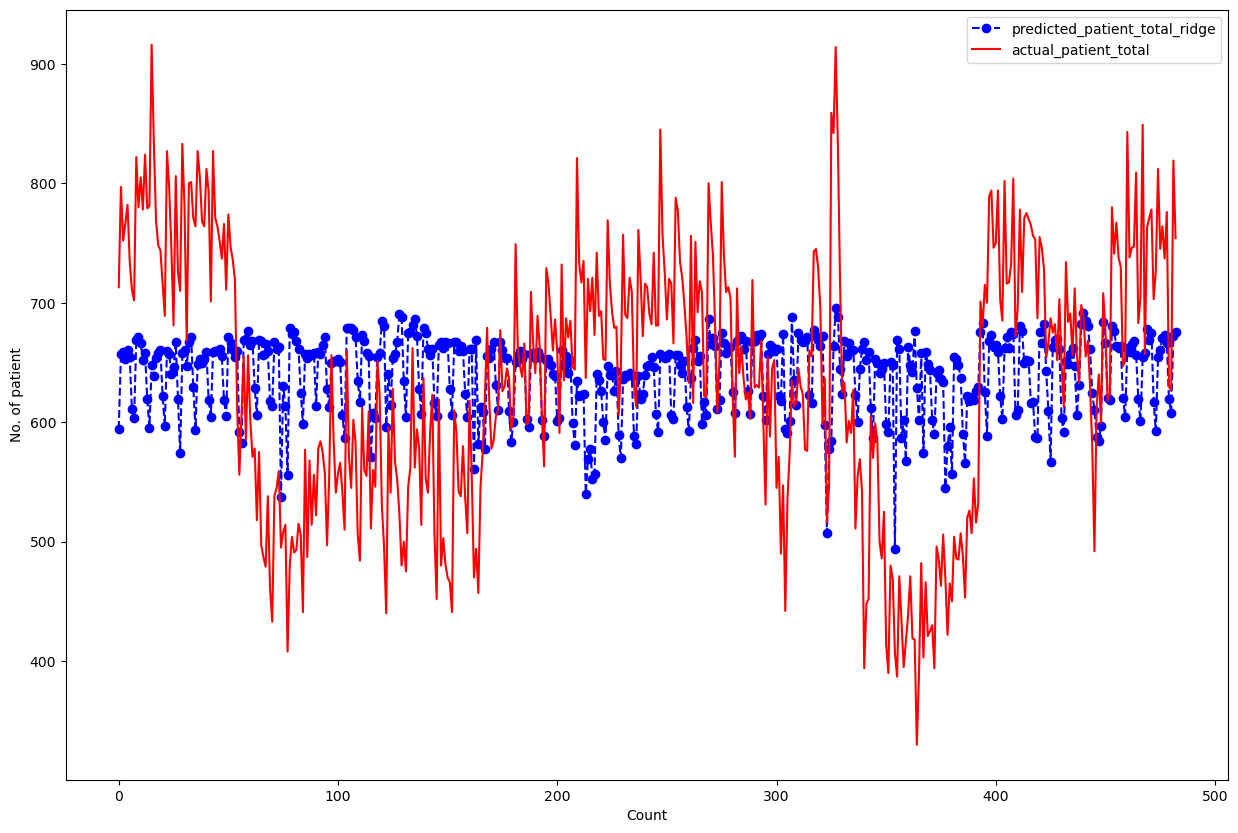

In [13]:
df_predicted_patient_total_ridge.plot(figsize=(15,10), color='blue', marker='o', linestyle='dashed')
y_total.plot(color='red')

plt.legend(['predicted_patient_total_ridge','actual_patient_total'])  
plt.xlabel("Count")  
plt.ylabel("No. of patient") 
plt.show()

In [14]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_total_train,X_train_Sm).fit()
print(ls.summary())

                                 OLS Regression Results                                 
Dep. Variable:     No. of A&E first attendances   R-squared:                       0.089
Model:                                      OLS   Adj. R-squared:                  0.035
Method:                           Least Squares   F-statistic:                     1.640
Date:                          Fri, 05 May 2023   Prob (F-statistic):              0.119
Time:                                  02:42:17   Log-Likelihood:                -882.20
No. Observations:                           144   AIC:                             1782.
Df Residuals:                               135   BIC:                             1809.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------

# The second ridge regression model is for total adult patient 

In [15]:
X_train, X_test, y_adult_train, y_adult_test = train_test_split(X, y_adult, test_size=0.7, random_state=101)

In [16]:
pipeline_adult = make_pipeline(StandardScaler(), Ridge(alpha=0.001))
pipeline_adult.fit(X_train, y_adult_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.001))])

In [17]:
y_adult_train_pred = pipeline_adult.predict(X_train)
y_adult_test_pred = pipeline_adult.predict(X_test)
y_adult_pred_ridge = pipeline_adult.predict(X)

In [18]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_adult_train, y_adult_train_pred),
                mean_squared_error(y_adult_test, y_adult_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_adult_train, y_adult_train_pred), r2_score(y_adult_test, y_adult_test_pred)))

MSE train: 63559.610, test: 77492.529
R^2 train: 0.054, test: 0.021


In [19]:
df_predicted_patient_adult_ridge = pd.DataFrame(y_adult_pred_ridge,index=y_adult.index,columns = ['predicted_patient_adult_ridge'])  
df_predicted_patient_adult_ridge

,predicted_patient_adult_ridge
0,2840.384947
1,2788.362183
2,2863.058114
3,2873.809147
4,2844.009472
...,...
478,2789.767081
479,2787.012477
480,2864.277060
481,2752.977873


In [20]:
new_df_adult_ridge = pd.DataFrame()
new_df_adult_ridge['actual_patient_adult'] = list(y_adult)
new_df_adult_ridge['predicted_patient_adult'] = y_adult_pred_ridge
new_df_adult_ridge

,actual_patient_adult,predicted_patient_adult
0,3255,2840.384947
1,3269,2788.362183
2,3136,2863.058114
3,3118,2873.809147
4,3104,2844.009472
...,...,...
478,2794,2789.767081
479,2715,2787.012477
480,2769,2864.277060
481,2800,2752.977873


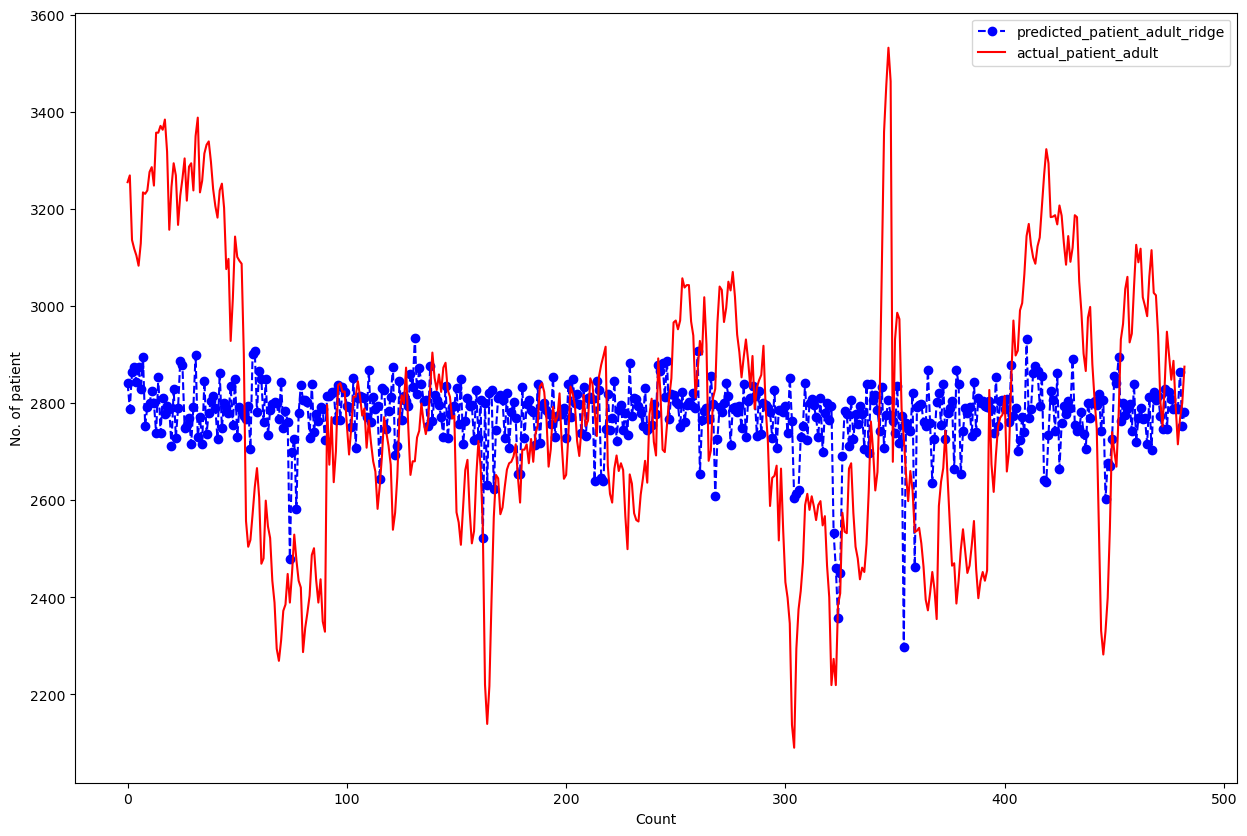

In [21]:
df_predicted_patient_adult_ridge.plot(figsize=(15,10), color='blue', marker='o', linestyle='dashed')
y_adult.plot(color='red')

plt.legend(['predicted_patient_adult_ridge','actual_patient_adult'])  
plt.xlabel("Count")  
plt.ylabel("No. of patient") 
plt.show()

In [22]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_adult_train,X_train_Sm).fit()
print(ls.summary())

                             OLS Regression Results                            
Dep. Variable:     total adult patient   R-squared:                       0.054
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.9678
Date:                 Fri, 05 May 2023   Prob (F-statistic):              0.464
Time:                         02:42:30   Log-Likelihood:                -1000.6
No. Observations:                  144   AIC:                             2019.
Df Residuals:                      135   BIC:                             2046.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

# The last ridge regression model is for total children patient

In [23]:
X_train, X_test, y_children_train, y_children_test = train_test_split(X, y_children, test_size=0.7, random_state=101)

In [24]:
pipeline_children = make_pipeline(StandardScaler(), Ridge(alpha=0.001))
pipeline_children.fit(X_train, y_children_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.001))])

In [25]:
y_children_train_pred = pipeline_children.predict(X_train)
y_children_test_pred = pipeline_children.predict(X_test)
y_children_pred_ridge = pipeline_children.predict(X)

In [26]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_children_train, y_children_train_pred),
                mean_squared_error(y_children_test, y_children_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_children_train, y_children_train_pred), r2_score(y_children_test, y_children_test_pred)))

MSE train: 2699.111, test: 2731.619
R^2 train: 0.063, test: 0.005


In [27]:
df_predicted_patient_children_ridge = pd.DataFrame(y_children_pred_ridge,index=y_children.index,columns = ['predicted_patient_children_ridge'])  
df_predicted_patient_children_ridge

,predicted_patient_children_ridge
0,199.878460
1,202.200751
2,210.703731
3,206.960934
4,212.236773
...,...
478,214.162031
479,193.024578
480,211.102172
481,212.931911


In [28]:
new_df_children_ridge = pd.DataFrame()
new_df_children_ridge['actual_patient_children'] = list(y_children)
new_df_children_ridge['predicted_patient_children'] = y_children_pred_ridge
new_df_children_ridge

,actual_patient_children,predicted_patient_children
0,256,199.878460
1,279,202.200751
2,286,210.703731
3,265,206.960934
4,264,212.236773
...,...,...
478,285,214.162031
479,246,193.024578
480,260,211.102172
481,291,212.931911


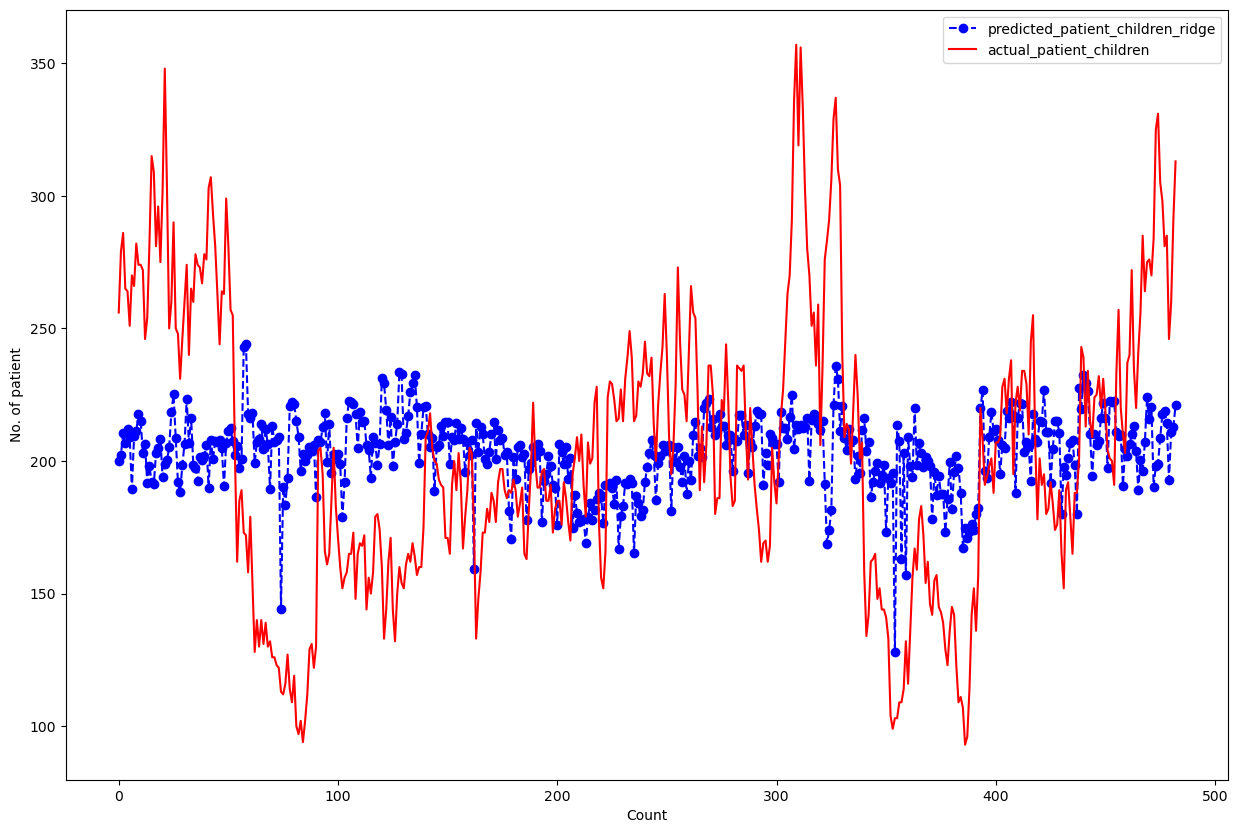

In [29]:
df_predicted_patient_children_ridge.plot(figsize=(15,10), color='blue', marker='o', linestyle='dashed')
y_children.plot(color='red')

plt.legend(['predicted_patient_children_ridge','actual_patient_children'])  
plt.xlabel("Count")  
plt.ylabel("No. of patient") 
plt.show()

In [30]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_children_train,X_train_Sm).fit()
print(ls.summary())

                              OLS Regression Results                              
Dep. Variable:     Total children patient   R-squared:                       0.063
Model:                                OLS   Adj. R-squared:                  0.008
Method:                     Least Squares   F-statistic:                     1.136
Date:                    Fri, 05 May 2023   Prob (F-statistic):              0.343
Time:                            02:42:42   Log-Likelihood:                -773.18
No. Observations:                     144   AIC:                             1564.
Df Residuals:                         135   BIC:                             1591.
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------